In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [10]:
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Дата          301355 non-null  datetime64[ns]
 1   Склад         301355 non-null  int64         
 2   Контрагент    301355 non-null  object        
 3   Номенклатура  301355 non-null  object        
 4   Количество    301355 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.5+ MB


Сгруппируйте данные по дате, посчитайте количество продаж

In [13]:
grouped_df = df.groupby('Дата').sum('Количество')

Вывести несколько первых строк сгруппированных данных

In [16]:
grouped_df#.head()

,Склад,Количество
Дата,,
2018-01-04,5314,3734
2018-01-05,3796,3643
2018-01-06,3678,3193
2018-01-07,3816,3298
2018-01-09,4962,4055
...,...,...
2018-08-26,4217,5302
2018-08-28,5043,5983
2018-08-29,4324,4969


Нарисуйте график продаж у `grouped_df`

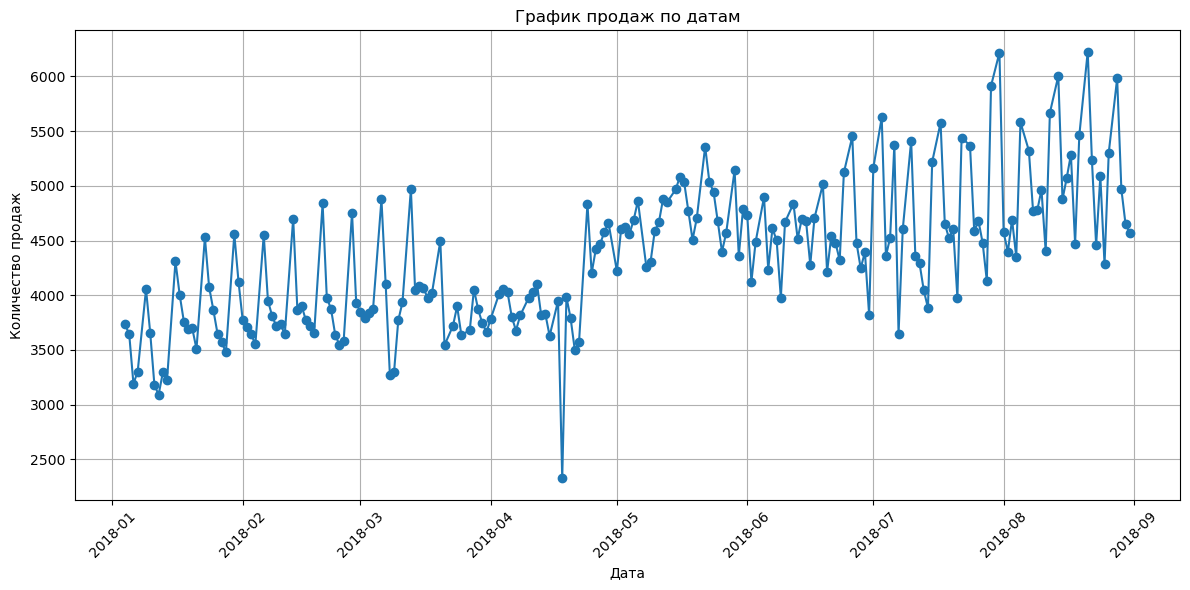

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_df.index, grouped_df['Количество'], marker='o', linestyle='-')
plt.title('График продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
1. График, демонстрирует волнообразное поведение, с пиками и падениями. Это может говорить о том, 
что в одни дни совершается больше покупок, в другие — меньше.

2.Возможно, что товары сезонные, потому что к осени идет подъем продаж, нежели чем в начале года и в апреле

3. ЕСТЬ пиково низкое значение, где линия графика сильно опускается вниз. возможно, это выходные, праздники или сбои в поставках.

4. Также возможно есть пробелы в данных или товары покупают в определенный день связанный с зарплатой или днем недели.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [26]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['Количество'] < lower) | (df['Количество'] > upper)]
max_outlier = outliers[outliers['Количество'] == outliers['Количество'].max()]

print(max_outlier)

             Дата  Склад   Контрагент Номенклатура  Количество
218822 2018-06-28      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [28]:
df_filtered = df[(df['Дата'].dt.month.isin([6, 7, 8])) &(df['Дата'].dt.weekday == 2) & (df['Склад'] == 3)]

top_product = df_filtered.groupby('Номенклатура')['Количество'].sum().sort_values(ascending=False)

print("Топовый товар по средам (июнь-июль-август) у склада 3:")
print(top_product.head(1))

Топовый товар по средам (июнь-июль-август) у склада 3:
Номенклатура
product_1    2267
Name: Количество, dtype: int64


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [30]:
max(df['Дата'])

Timestamp('2018-08-31 00:00:00')

In [32]:
min(df['Дата'])

Timestamp('2018-01-04 00:00:00')

In [48]:
weather_df = pd.read_excel('погода.xlsx')

In [50]:
weather_df.head()

,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,31.08.2018 21:00,9.6,736.4,767.9,1.2,88.0,"Ветер, дующий с западо-северо-запада",3,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,7.7,Следы осадков,12.0,NaN,NaN,NaN,NaN
1,31.08.2018 18:00,11.3,735.2,766.4,0.4,83.0,"Ветер, дующий с востоко-северо-востока",4,NaN,NaN,...,NaN,NaN,10.0,8.5,NaN,NaN,NaN,NaN,NaN,NaN
2,31.08.2018 15:00,12.3,734.8,765.9,0.9,80.0,"Ветер, дующий с северо-востока",4,NaN,NaN,...,NaN,NaN,4.0,8.9,NaN,NaN,NaN,NaN,NaN,NaN
3,31.08.2018 12:00,13.2,733.9,764.8,1.0,83.0,"Ветер, дующий с северо-северо-востока",4,NaN,NaN,...,NaN,NaN,10.0,10.3,3,12.0,NaN,NaN,NaN,NaN
4,31.08.2018 09:00,12.5,732.9,763.9,0.1,99.0,"Ветер, дующий с северо-северо-запада",2,NaN,NaN,...,NaN,NaN,4.0,12.3,3,12.0,Поверхность почвы сырая (вода застаивается на ...,8.0,NaN,NaN


In [76]:
weather_df.rename(columns={'Местное время в Астане': 'Дата', 'T': 'Температура'}, inplace=True)
weather_df['Дата'] = pd.to_datetime(weather_df['Дата'])
weather_df['Дата_без_времени'] = weather_df['Дата'].dt.date

daily_weather = weather_df.groupby('Дата_без_времени')['Температура'].mean().reset_index()
daily_weather.rename(columns={'Дата_без_времени': 'Дата', 'Температура': 'T'}, inplace=True)

In [78]:
daily_weather['Дата'] = pd.to_datetime(daily_weather['Дата'])
merged_df = pd.merge(grouped_df, daily_weather, on='Дата', how='left')

In [80]:
merged_df

,Дата,Склад,Количество,T
0,2018-01-04,5314,3734,-13.0875
1,2018-01-05,3796,3643,-17.2500
2,2018-01-06,3678,3193,-14.1250
3,2018-01-07,3816,3298,-12.3375
4,2018-01-09,4962,4055,-7.3875
...,...,...,...,...
200,2018-08-26,4217,5302,12.0500
201,2018-08-28,5043,5983,14.1000
202,2018-08-29,4324,4969,14.0375
203,2018-08-30,4282,4648,14.1625


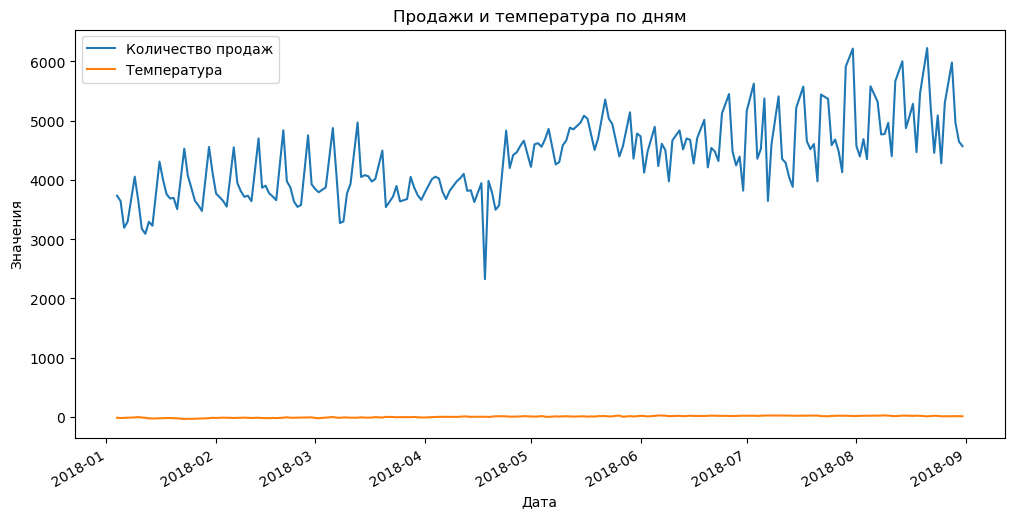

In [82]:
merged_df.set_index('Дата')[['Количество', 'T']].plot(figsize=(12, 6))

plt.title('Продажи и температура по дням')
plt.ylabel('Значения')
plt.xlabel('Дата')
plt.legend(['Количество продаж', 'Температура'])
plt.show()

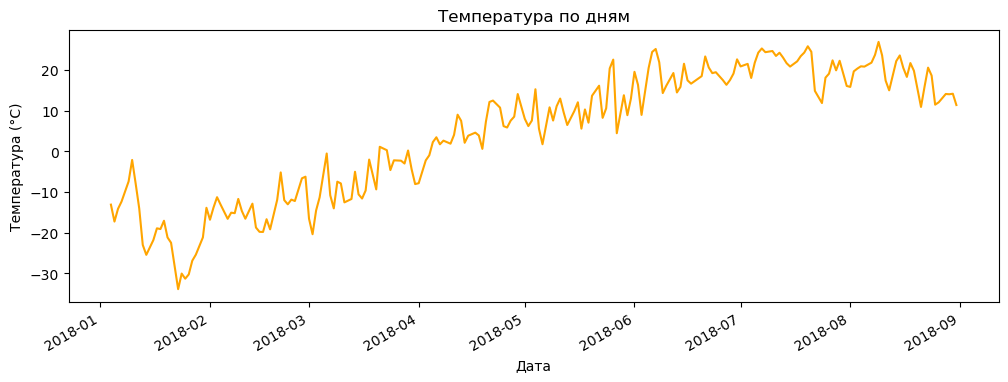

In [84]:
merged_df.set_index('Дата')['T'].plot(figsize=(12, 4), color='orange')
plt.title('Температура по дням')
plt.ylabel('Температура (°C)')
plt.xlabel('Дата')
plt.show()